In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

In [18]:
cancer_mortality_path = "Resources/Cancer_Mortality.csv"
cigarette_use_path = "Resources/Cigarette Use.csv"
gender_smoker_path = "Resources/gender_smoker_data.csv"

cancer_mortality_df = pd.read_csv(cancer_mortality_path)
cigarette_use_df = pd.read_csv(cigarette_use_path)
gender_smoker_df = pd.read_csv(gender_smoker_path)


In [19]:
cancer_mortality_df.head()

,Year,State,Rate,Deaths,Url
0,2018,AL,170.4,10632,/nchs/pressroom/states/alabama/al.htm
1,2018,AK,141.5,957,/nchs/pressroom/states/alaska/ak.htm
2,2018,AZ,131.9,12113,/nchs/pressroom/states/arizona/az.htm
3,2018,AR,168.8,6491,/nchs/pressroom/states/arkansas/ar.htm
4,2018,CA,135.0,59962,/nchs/pressroom/states/california/ca.htm


In [20]:
cigarette_use_df.head()

,State,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size
0,AL,19.2,17.9,20.5,"6,347"
1,AK,19.1,16.9,21.3,"2,698"
2,AZ,14.0,12.7,15.3,"7,758"
3,AR,22.7,20.9,24.5,"5,177"
4,CA,11.2,10.4,12.0,"11,118"


In [21]:

gender_smoker_df["All Adults"] = gender_smoker_df["All Adults"].map("{:.2%}".format)

gender_smoker_df.head()

,State,All Adults,Male,Female
0,AL,19.20%,0.213,0.173
1,AK,19.10%,0.208,0.173
2,AZ,14.00%,0.155,0.126
3,AR,22.70%,0.239,0.217
4,CA,11.20%,0.148,0.078


In [22]:
cigarette_df_renamed = cigarette_use_df.rename(columns={"Data_Value": "Percentage of Smokers",
                                                    "Sample_Size": "Sample Size"})

del cigarette_df_renamed["Low_Confidence_Limit"]
del cigarette_df_renamed["High_Confidence_Limit"]

cigarette_df_renamed.head()

,State,Percentage of Smokers,Sample Size
0,AL,19.2,"6,347"
1,AK,19.1,"2,698"
2,AZ,14.0,"7,758"
3,AR,22.7,"5,177"
4,CA,11.2,"11,118"


In [23]:
smoking_death = pd.merge(cigarette_df_renamed, cancer_mortality_df, how='right', on="State")
smoking_death.dropna(how="any")
smoking_death.head()

,State,Percentage of Smokers,Sample Size,Year,Rate,Deaths,Url
0,AL,19.2,"6,347",2018,170.4,10632,/nchs/pressroom/states/alabama/al.htm
1,AK,19.1,"2,698",2018,141.5,957,/nchs/pressroom/states/alaska/ak.htm
2,AZ,14.0,"7,758",2018,131.9,12113,/nchs/pressroom/states/arizona/az.htm
3,AR,22.7,"5,177",2018,168.8,6491,/nchs/pressroom/states/arkansas/ar.htm
4,CA,11.2,"11,118",2018,135.0,59962,/nchs/pressroom/states/california/ca.htm


In [24]:
gender_smoking_death = pd.merge(smoking_death, gender_smoker_df, how='right', on="State")
gender_smoking_death.dropna(how="any")
gender_smoking_death.dropna(how="any")
gender_smoking_death.head()

,State,Percentage of Smokers,Sample Size,Year,Rate,Deaths,Url,All Adults,Male,Female
0,AL,19.2,"6,347",2018.0,170.4,10632.0,/nchs/pressroom/states/alabama/al.htm,19.20%,0.213,0.173
1,AK,19.1,"2,698",2018.0,141.5,957.0,/nchs/pressroom/states/alaska/ak.htm,19.10%,0.208,0.173
2,AZ,14.0,"7,758",2018.0,131.9,12113.0,/nchs/pressroom/states/arizona/az.htm,14.00%,0.155,0.126
3,AR,22.7,"5,177",2018.0,168.8,6491.0,/nchs/pressroom/states/arkansas/ar.htm,22.70%,0.239,0.217
4,CA,11.2,"11,118",2018.0,135.0,59962.0,/nchs/pressroom/states/california/ca.htm,11.20%,0.148,0.078


In [75]:
filtered_smoking_death = gender_smoking_death[["State", "Percentage of Smokers", "Deaths", "Male", "Female"]]

filtered_smoking_death = filtered_smoking_death.set_index("State")

filtered_smoking_death["Male"] = filtered_smoking_death["Male"].map("{:.2%}".format)
filtered_smoking_death["Female"] = filtered_smoking_death["Female"].map("{:.2%}".format)
filtered_smoking_death.dropna(how="any")

filtered_smoking_death.head()

,Percentage of Smokers,Deaths,Male,Female
State,,,,
AL,19.2,10632.0,21.30%,17.30%
AK,19.1,957.0,20.80%,17.30%
AZ,14.0,12113.0,15.50%,12.60%
AR,22.7,6491.0,23.90%,21.70%
CA,11.2,59962.0,14.80%,7.80%


In [76]:
# numeric = filtered_smoking_death[["Percentage of Smokers", "Deaths"]].apply(pd.to_numeric)
filtered_smoking_death["Percentage of Smokers"] = pd.to_numeric(filtered_smoking_death["Percentage of Smokers"])
filtered_smoking_death["Deaths"] = pd.to_numeric(filtered_smoking_death["Deaths"])

# filtered_smoking_death['Percentage of Smokers'] = filtered_smoking_death['Percentage of Smokers'].astype(str)
# filtered_smoking_death['Deaths'] = filtered_smoking_death['Deaths'].astype(str)
filtered_smoking_death.dtypes

Percentage of Smokers    float64
Deaths                   float64
Male                      object
Female                    object
dtype: object

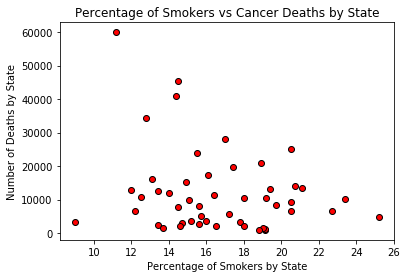

In [96]:
plt.scatter(filtered_smoking_death["Percentage of Smokers"], filtered_smoking_death["Deaths"], marker="o", facecolors="red", edgecolors="black")

plt.xlabel("Percentage of Smokers by State")
plt.ylabel("Number of Deaths by State")
plt.title("Percentage of Smokers vs Cancer Deaths by State")

# filtered_smoking_death.replace([np.inf, -np.inf], (0))
# filtered_smoking_death.dropna(how="any")

# filtered_smoking_death.replace([np.inf, -np.inf], np.nan).dropna(subset=["Percentage of Smokers", "Deaths"], how="all")

# smokers = filtered_smoking_death.iloc[:,0]
# deaths = filtered_smoking_death.iloc[:,1]
# correlation = sts.pearsonr(smokers,deaths)
# print(f"The correlation is {round(correlation[0],2)}")

plt.savefig("Images/smokers_state")
plt.show()

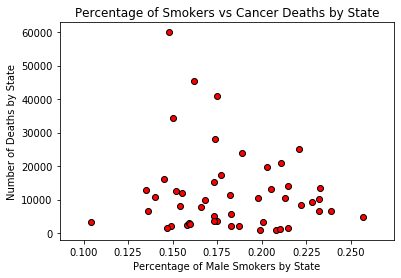

In [27]:
plt.scatter(gender_smoking_death["Male"], gender_smoking_death["Deaths"], marker="o", facecolors="red", edgecolors="black")
plt.xlabel("Percentage of Male Smokers by State")
plt.ylabel("Number of Deaths by State")
plt.title("Percentage of Smokers vs Cancer Deaths by State")

plt.savefig("Images/male_smokers")
plt.show()

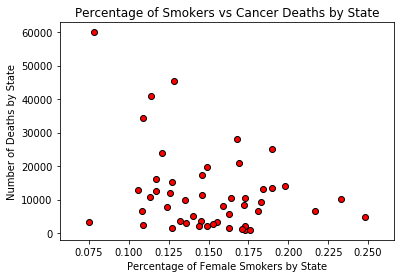

In [28]:
plt.scatter(gender_smoking_death["Female"], gender_smoking_death["Deaths"], marker="o", facecolors="red", edgecolors="black")
plt.xlabel("Percentage of Female Smokers by State")
plt.ylabel("Number of Deaths by State")
plt.title("Percentage of Smokers vs Cancer Deaths by State")

plt.savefig("Images/female_smokers")
plt.show()